
(734, 11)
(184, 11)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1536      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None

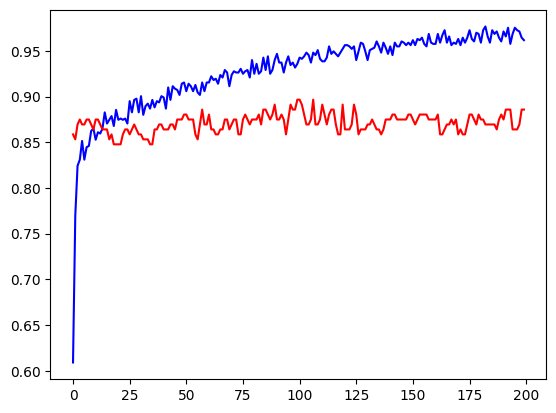

In [1]:
#deep learning(heart.csv)
import pandas as pd
df = pd.read_csv('D:\python.list\heart.csv')
df.head()

df.describe()

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
import tensorflow as tf
from tensorflow import keras

model_encoder = LabelEncoder()
encod=['ChestPainType','RestingECG','ExerciseAngina','ST_Slope','Sex']
for i in encod:
    df[i] = df[i].fillna('unknown')
    df[i]=model_encoder.fit_transform(df[i])

from sklearn.model_selection import train_test_split

x=df.drop('HeartDisease',axis=1)
y=df['HeartDisease']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

x_train=np.array(x_train)
x_test=np.array(x_test)
y_train=np.array(y_train)
y_test=np.array(y_test)

#این کار که جدا نوشتم برای زمانیه که داده تست رو اصلا نداریم ما و نمیدونیم چی هست
model_standard = StandardScaler()
x_train = model_standard.fit_transform(x_train)
x_test = model_standard.transform(x_test)

print(x_train.shape)
print(x_test.shape)

model=keras.Sequential()
model.add(keras.layers.Dense(units=128,activation='relu',input_shape=(11,)))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(units=128,activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(units=128,activation='relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(units=128,activation='relu'))
model.add(keras.layers.Dense(units=1,activation='sigmoid'))

model.compile(optimizer= tf.optimizers.Adam(),loss=tf.losses.binary_crossentropy,metrics=['accuracy'])
model.summary()

hist=model.fit(x_train,y_train,epochs=200,batch_size=128,validation_data=(x_test,y_test))

plt.plot(hist.history['accuracy'],color='blue')
plt.plot(hist.history['val_accuracy'],color='red')
plt.show()